### Inspecting database, cleaning and transforming data 
-  aligning misalligned rows,
-  deleting irrelevant columns,
-  converting date to datetime (year, month, weekday)
- cleaning and standardising names in columns (as much as possible):
   -  nr of engines
   -  amateur build
   -  make
   -  weather conditions
   -  broad phase of flight
   -  airport class
-  filling NA with UNKNOWN or 0
-  creating target column of nr of none, minor, serious or fatal injuries to binary column of none-minor or serious-fatal injuries
-  choosing subset of data limited to:
   -  country: US
   -  year: after 1982
   -  aircraft category: airplane and helicopter

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('AviationData.csv')

C:\Users\Enter\AppData\Local\Temp\ipykernel_7016\3738267037.py:1: DtypeWarning: Columns (6,7,28,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('AviationData.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Information on columns and number of null values in columns

df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11402
Total.Serious.Injuries    12511
Total.Minor.Injuries      11934
Total.Uninjured            5913
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6382
Publication.Date          13771
Unnamed:

In [5]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight,Report.Status,Publication.Date,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Cruise,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Unknown,Probable Cause,19-09-1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Cruise,Probable Cause,26-02-2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Cruise,Probable Cause,12-09-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Approach,Probable Cause,16-04-1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

In [7]:
# Dropping columns that are irrelevant after inspection

df1 =df.drop(columns = ['Event.Id','Accident.Number','Registration.Number','FAR.Description','Schedule','Publication.Date', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37' ],axis=1)

In [8]:
# Coverting date to datetime

df1['Event.Date'] = pd.to_datetime(df1['Event.Date'])

#Adding day, month & year column

df1['Year'] = df1['Event.Date'].dt.year
df1['Month.Abbr'] = df1['Event.Date'].dt.month_name().str[:3]
df1['Day.Name.Abbr'] = df1['Event.Date'].dt.day_name().str[:3]

# Adding weekend column

df1.loc[(df1['Day.Name.Abbr'] == 'Sat') | (df1['Day.Name.Abbr'] == 'Sun'), 'Weekend'] = True
df1.loc[(df1['Day.Name.Abbr'] != 'Sat') & (df1['Day.Name.Abbr'] != 'Sun'), 'Weekend'] = False

<AxesSubplot:>

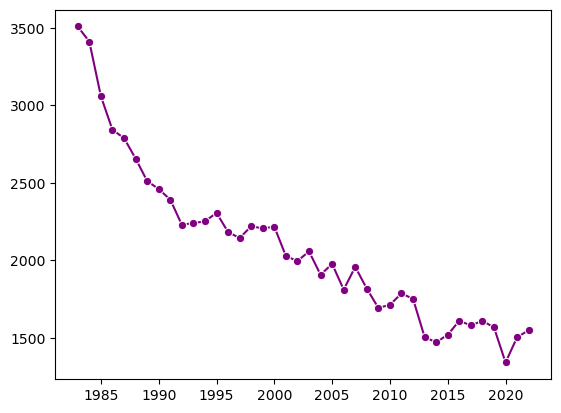

In [86]:
df1 = df1[df1['Year']>1982]
year_counts=df1['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='purple')

In [11]:
df1['Location'].fillna('UNKNOWN',inplace=True)
df1['Country'].fillna('UNKNOWN',inplace=True)
df1['Aircraft.damage'].fillna('UNKNOWN',inplace=True)
df1['Aircraft.damage'].replace({'Unknown':'UNKNOWN'},inplace=True)
df1['Aircraft.Category'].fillna('UNKNOWN',inplace=True)
df1['Purpose.of.flight'].fillna('UNKNOWN',inplace=True)
df1['Amateur.Built'].fillna('UNKNOWN',inplace=True)
df1['Airport.Name'].fillna('None',inplace=True)
df1['Airport.Code'].fillna('None',inplace=True)
df1['Model'].fillna('UNKNOWN',inplace=True)
df1['Make'].fillna('UNKNOWN',inplace=True)
df1['Number.of.Engines'].fillna('UNKNOWN',inplace=True)
#df_US =df_US[df_US['Number.of.Engines'].str.contains("UNKNOWN")==False]
df1['Engine.Type'].fillna('UNKNOWN',inplace=True)
#df_US =df_US[df_US['Engine.Type'].str.contains("Unknown")==False]
#df_US =df_US[df_US['Engine.Type'].str.contains("UNKNOWN")==False]
df1['Total.Fatal.Injuries'].fillna(0,inplace=True)
df1['Total.Minor.Injuries'].fillna(0,inplace=True)
df1['Total.Uninjured'].fillna(0,inplace=True)
df1['Total.Serious.Injuries'].fillna(0,inplace=True)
df1['Broad.phase.of.flight'].fillna('UNKNOWN',inplace = True)
#df_US1 =df_US[df_US['Broad.phase.of.flight'].str.contains("Unknown")==False]
#df_US =df_US[df_US['Broad.phase.of.flight'].str.contains("UNKNOWN")==False]
df1['Weather.Condition'].fillna('UNKNOWN',inplace = True)

In [12]:
df1['Country'] = df1['Country'].replace('MISSING', 'UNKNOWN')

In [13]:
df1.isnull().sum()

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Latitude                  50910
Longitude                 50919
Airport.Code                  0
Airport.Name                  0
Injury.Severity            1000
Aircraft.damage               0
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Air.carrier               68876
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              6382
Year                          0
Month.Abbr                    0
Day.Name.Abbr                 0
Weekend                       0
dtype: int64

In [14]:
df1['Aircraft.Category'].value_counts()

UNKNOWN              56566
Airplane             24441
Helicopter            3151
Glider                 456
Balloon                201
Weight-Shift           161
Gyrocraft              158
Powered Parachute       91
Ultralight              29
Unknown                 13
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [15]:
df1=df1[(df1['Aircraft.Category']=="UNKNOWN") | (df1['Aircraft.Category']=="Airplane") | (df1['Aircraft.Category']=="Helicopter")]


In [16]:
df1['Aircraft.Category'].value_counts()

UNKNOWN       56566
Airplane      24441
Helicopter     3151
Name: Aircraft.Category, dtype: int64

In [17]:
df1['Number.of.Engines'].value_counts()

1.0        66070
2.0        10571
UNKNOWN     5908
0.0          727
3.0          461
4.0          419
8.0            1
6.0            1
Name: Number.of.Engines, dtype: int64

In [18]:
df1=df1[(df1['Number.of.Engines']=="UNKNOWN") | (df1['Number.of.Engines']==1.0) | (df1['Number.of.Engines']==2.0) | (df1['Number.of.Engines']==3.0) | (df1['Number.of.Engines']==4.0)]

In [19]:
df1['Number.of.Engines'].value_counts()

1.0        66070
2.0        10571
UNKNOWN     5908
3.0          461
4.0          419
Name: Number.of.Engines, dtype: int64

In [20]:
df1['Number.of.Engines']=df1['Number.of.Engines'].replace(1.0, 'one')
df1['Number.of.Engines']=df1['Number.of.Engines'].replace(2.0, 'two')
df1['Number.of.Engines']=df1['Number.of.Engines'].replace(3.0, 'three_to_four')
df1['Number.of.Engines']=df1['Number.of.Engines'].replace(4.0, 'three_to_four')

In [21]:
df1['Number.of.Engines'].value_counts()

one              66070
two              10571
UNKNOWN           5908
three_to_four      880
Name: Number.of.Engines, dtype: int64

In [22]:
df1['Engine.Type'].value_counts()

Reciprocating      65819
UNKNOWN             6325
Turbo Shaft         3476
Turbo Prop          3305
Turbo Fan           2439
Unknown             1367
Turbo Jet            679
Geared Turbofan       12
Electric               6
UNK                    1
Name: Engine.Type, dtype: int64

In [23]:
df1['Engine.Type']=df1['Engine.Type'].replace('Unknown', 'UNKNOWN')
df1['Engine.Type']=df1['Engine.Type'].replace('UNK', 'UNKNOWN')
df1['Engine.Type']=df1['Engine.Type'].replace('Electric', 'UNKNOWN')
df1['Engine.Type']=df1['Engine.Type'].replace('Geared Turbofan', 'Turbo Fan')

In [24]:
df1['Engine.Type'].value_counts()

Reciprocating    65819
UNKNOWN           7699
Turbo Shaft       3476
Turbo Prop        3305
Turbo Fan         2451
Turbo Jet          679
Name: Engine.Type, dtype: int64

In [25]:
df1['Amateur.Built'].value_counts()

No         75339
Yes         7989
UNKNOWN      101
Name: Amateur.Built, dtype: int64

In [26]:
df1['Purpose.of.flight'].value_counts()

Personal                     46277
Instructional                10001
UNKNOWN                       6156
Unknown                       6072
Aerial Application            4546
Business                      3664
Positioning                   1640
Other Work Use                1191
Aerial Observation             741
Ferry                          735
Public Aircraft                645
Executive/corporate            501
Flight Test                    387
Skydiving                      179
External Load                  122
Public Aircraft - Federal      104
Banner Tow                     101
Air Race show                   78
Public Aircraft - Local         73
Public Aircraft - State         64
Air Race/show                   51
Firefighting                    40
Glider Tow                      39
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [27]:
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Unknown', 'UNKNOWN')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Air Race/show', 'Air Race show')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Executive/corporate', 'Business')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('PUBS', 'Public Aircraft')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('PUBL', 'Public Aircraft')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Public Aircraft - Federal', 'Public Aircraft')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Public Aircraft - Local', 'Public Aircraft')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Public Aircraft - State', 'Public Aircraft')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Other Work Use', 'Other')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Skydiving', 'Other')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Air Race show', 'Other')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('External Load', 'Other')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Firefighting', 'Other')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Banner Tow', 'Other')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Glider Tow', 'Other')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('Air Drop', 'Other')
df1['Purpose.of.flight']=df1['Purpose.of.flight'].replace('ASHO', 'Other')

In [28]:
df1['Purpose.of.flight'].value_counts()

Personal              46277
UNKNOWN               12228
Instructional         10001
Aerial Application     4546
Business               4165
Other                  1818
Positioning            1640
Public Aircraft         891
Aerial Observation      741
Ferry                   735
Flight Test             387
Name: Purpose.of.flight, dtype: int64

In [29]:
df1['Weather.Condition'].value_counts()

VMC        72346
IMC         5625
UNKNOWN     4443
UNK          756
Unk          259
Name: Weather.Condition, dtype: int64

In [30]:
df1['Weather.Condition']=df1['Weather.Condition'].replace('Unk', 'UNKNOWN')
df1['Weather.Condition']=df1['Weather.Condition'].replace('UNK', 'UNKNOWN')

In [31]:
df1['Weather.Condition'].value_counts()

VMC        72346
IMC         5625
UNKNOWN     5458
Name: Weather.Condition, dtype: int64

In [32]:
df1['Broad.phase.of.flight'].value_counts()

UNKNOWN        26005
Landing        14259
Takeoff        11644
Cruise          9582
Maneuvering     7649
Approach        6009
Climb           1926
Taxi            1822
Descent         1745
Go-around       1295
Standing         904
Unknown          487
Other            102
Name: Broad.phase.of.flight, dtype: int64

In [33]:
df1['Broad.phase.of.flight']=df1['Broad.phase.of.flight'].replace('Unknown', 'UNKNOWN')
df1['Broad.phase.of.flight']=df1['Broad.phase.of.flight'].replace('Other', 'UNKNOWN')

In [34]:
df1['Broad.phase.of.flight'].value_counts()

UNKNOWN        26594
Landing        14259
Takeoff        11644
Cruise          9582
Maneuvering     7649
Approach        6009
Climb           1926
Taxi            1822
Descent         1745
Go-around       1295
Standing         904
Name: Broad.phase.of.flight, dtype: int64

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83429 entries, 3600 to 88888
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      83429 non-null  object        
 1   Event.Date              83429 non-null  datetime64[ns]
 2   Location                83429 non-null  object        
 3   Country                 83429 non-null  object        
 4   Latitude                33160 non-null  object        
 5   Longitude               33151 non-null  object        
 6   Airport.Code            83429 non-null  object        
 7   Airport.Name            83429 non-null  object        
 8   Injury.Severity         82434 non-null  object        
 9   Aircraft.damage         83429 non-null  object        
 10  Aircraft.Category       83429 non-null  object        
 11  Make                    83429 non-null  object        
 12  Model                   83429 non-null  obj

In [36]:
df1['Injury.Severity'] = df1['Injury.Severity'].str.split('(').str[0]
df1['Injury.Severity'].value_counts()

Non-Fatal      63082
Fatal          16829
Incident        2079
Minor            209
Serious          160
Unavailable       75
Name: Injury.Severity, dtype: int64

In [37]:
df1['Injury.Severity'].isna().sum()

995

In [38]:
df1['Injury.Severity'].fillna('Unavailable',inplace = True)

In [39]:
df1['Make']=df1['Make'].str.title()

In [40]:
df1 = df1[df1['Make']!='Balloon Works']

In [41]:
make = df1['Make'].value_counts()
make.head(50)

Cessna                            25777
Piper                             14095
Beech                              5097
Boeing                             2680
Bell                               2581
Mooney                             1277
Robinson                           1207
Grumman                            1065
Bellanca                            982
Hughes                              873
Air Tractor                         673
Aeronca                             607
Mcdonnell Douglas                   591
Maule                               570
Schweizer                           549
Champion                            507
Stinson                             421
Aero Commander                      412
De Havilland                        404
Luscombe                            391
North American                      370
Taylorcraft                         366
Aerospatiale                        361
Rockwell                            338
Hiller                              330


df1['Make']=df1['Make'].replace('Robinson Helicopter', 'Robinson')
df1['Make']=df1['Make'].replace('Robinson Helicopter Company', 'Robinson')
df1['Make']=df1['Make'].replace('Cirrus Design Corp', 'Cirrus')
df1['Make']=df1['Make'].replace('Air Tractor Inc', 'Air Tractor')
df1['Make']=df1['Make'].replace('Airbus Industrie', 'Airbus')
df1['Make']=df1['Make'].replace('Grumman American', 'Grumman')
df1['Make']=df1['Make'].replace('Douglas', 'Mcdonnell Douglas')
df1['Make']=df1['Make'].replace('Ercoupe (Eng & Research Corp.)', 'Ercoupe')
df1['Make']=df1['Make'].replace('Cirrus Design Corp.', 'Cirrus')
df1['Make']=df1['Make'].replace('Rockwell International', 'Rockwell')
df1['Make']=df1['Make'].replace('Fairchild', 'Swearingen')
df1['Make']=df1['Make'].replace('Aviat Aircraft Inc', 'Aviat')
df1['Make']=df1['Make'].replace('Pitts', 'Aviat')
df1['Make']=df1['Make'].replace('Navion', 'Ryan')
df1['Make']=df1['Make'].replace('Bombardier Inc', 'Bombardier')
df1['Make']=df1['Make'].replace('Bombardier Inc', 'Bombardier')

In [42]:
df1['Make'] = df1['Make'].replace(r'^Robinson.*', 'Robinson', regex=True)
df1['Make'] = df1['Make'].replace(r'^Air Tractor.*', 'Air Tractor', regex=True)
df1['Make'] = df1['Make'].replace(r'^Douglas.*', 'Mcdonnell Douglas', regex=True)
df1['Make'] = df1['Make'].replace(r'^douglas.*', 'Mcdonnell Douglas', regex=True)
df1['Make'] = df1['Make'].replace(r'^Mcdonnell.*', 'Mcdonnell Douglas', regex=True)
df1['Make'] = df1['Make'].replace(r'^Cirrus.*', 'Cirrus', regex=True)
df1['Make'] = df1['Make'].replace(r'^Airbus.*', 'Airbus', regex=True)
df1['Make'] = df1['Make'].replace(r'^Grumman.*', 'Grumman', regex=True)
df1['Make'] = df1['Make'].replace(r'^Ercoupe.*', 'Ercoupe', regex=True)

df1['Make'] = df1['Make'].replace(r'^Aviat.*', 'Aviat', regex=True)
df1['Make'] = df1['Make'].replace(r'^Bombardier.*', 'Bombardier', regex=True)
df1['Make'] = df1['Make'].replace(r'^Aerostar.*', 'Aerostar', regex=True)
df1['Make'] = df1['Make'].replace(r'^Wsk.*', 'WSK', regex=True)
df1['Make'] = df1['Make'].replace(r'^Boeing.*', 'Boeing', regex=True)
df1['Make'] = df1['Make'].replace(r'^Cessna.*', 'Cessna', regex=True)
df1['Make'] = df1['Make'].replace(r'^Piper.*', 'Piper', regex=True)
df1['Make'] = df1['Make'].replace(r'^Beech.*', 'Beech', regex=True)
df1['Make'] = df1['Make'].replace(r'^Bell.*', 'Bell', regex=True)
df1['Make'] = df1['Make'].replace(r'^Mooney.*', 'Mooney', regex=True)
df1['Make'] = df1['Make'].replace(r'^Hughes.*', 'Hughes', regex=True)
df1['Make'] = df1['Make'].replace(r'^Aeronca.*', 'Aeronca', regex=True)

df1['Make'] = df1['Make'].replace(r'^Maule.*', 'Maule', regex=True)
df1['Make'] = df1['Make'].replace(r'^Aeronca.*', 'Aeronca', regex=True)
df1['Make'] = df1['Make'].replace(r'^Champion.*', 'Champion', regex=True)
df1['Make'] = df1['Make'].replace(r'^Stinson.*', 'Stinson', regex=True)
df1['Make'] = df1['Make'].replace(r'^Rockwell.*', 'Rockwell', regex=True)
df1['Make'] = df1['Make'].replace(r'^Aero Commander.*', 'Aero Commander', regex=True)
df1['Make'] = df1['Make'].replace(r'^Ayers.*', 'Ayres Thrush', regex=True)


df1['Make'] = df1['Make'].replace(r'^De Havillande.*', 'De Havilland', regex=True)
df1['Make'] = df1['Make'].replace(r'^Luscombe.*', 'Luscombe', regex=True)
df1['Make'] = df1['Make'].replace(r'^Champion.*', 'Champion', regex=True)
df1['Make'] = df1['Make'].replace(r'^North American.*', 'North American', regex=True)
df1['Make'] = df1['Make'].replace(r'^Taylorcraft.*', 'Taylorcraft', regex=True)
df1['Make'] = df1['Make'].replace(r'^Aerospatiale.*', 'Aerospatiale', regex=True)

In [43]:
df1['Make'] = df1['Make'].replace(r'^Hiller.*', 'Hiller', regex=True)
df1['Make'] = df1['Make'].replace(r'^Swearingen.*', 'Swearingen', regex=True)
df1['Make'] = df1['Make'].replace(r'^Enstrom.*', 'Enstrom', regex=True)
df1['Make'] = df1['Make'].replace(r'^Embraer.*', 'Embraer', regex=True)
df1['Make'] = df1['Make'].replace(r'^Aviat.*', 'Aviat', regex=True)
df1['Make'] = df1['Make'].replace(r'^Ercoupe.*', 'Ercoupe', regex=True)
df1['Make'] = df1['Make'].replace(r'^Gulfstream.*', 'Gulfstream', regex=True)
df1['Make'] = df1['Make'].replace(r'^Sikorsky.*', 'Sikorsky', regex=True)
df1['Make'] = df1['Make'].replace(r'^Eurocopter.*', 'Eurocopter', regex=True)
df1['Make'] = df1['Make'].replace(r'^Dehavilland.*', 'De Havilland', regex=True)
df1['Make'] = df1['Make'].replace(r'^Gulfstream.*', 'Gulfstream', regex=True)
df1['Make'] = df1['Make'].replace(r'^Raytheon.*', 'Raytheon', regex=True)
df1['Make'] = df1['Make'].replace(r'^Diamond.*', 'Diamond', regex=True)

In [44]:
df1['Make']=df1['Make'].replace('Fairchild', 'Swearingen')
df1['Make']=df1['Make'].replace('Navion', 'Ryan')
df1['Make']=df1['Make'].replace('Aerostar', 'Piper')
df1['Make']=df1['Make'].replace('Aerostar', 'Piper')
df1['Make']=df1['Make'].replace('Grumman American Avn. Corp.', 'Grumman')
df1['Make']=df1['Make'].replace('Grumman Acft Eng Cor-Schweizer', 'Schweizer')
df1['Make']=df1['Make'].replace('Gulfstream American', 'Gulfstream')
df1['Make']=df1['Make'].replace('Eurocopter France', 'Eurocopter')
df1['Make']=df1['Make'].replace('Ayres Corporation', 'Ayres')
df1['Make']=df1['Make'].replace('Mooney Aircraft Corp.', 'Mooney')
df1['Make']=df1['Make'].replace('Mcdonnell Douglas Helicopter', 'Mcdonnell Douglas')
df1['Make']=df1['Make'].replace('The Boeing Company', 'Boeing')
df1['Make']=df1['Make'].replace('Schweizer Aircraft Corp', 'Schweizer')


In [45]:
make = df1['Make'].value_counts()

make.to_csv('make.csv',index=True)
make.head(50)

Cessna               25838
Piper                14235
Beech                 5133
Bell                  3648
Boeing                2766
Robinson              1658
Grumman               1527
Mooney                1328
Mcdonnell Douglas      918
Air Tractor            900
Hughes                 881
Aeronca                610
Maule                  572
Schweizer              569
Champion               507
De Havilland           506
Airbus                 472
Cirrus                 466
Stinson                421
Rockwell               413
Aero Commander         412
Luscombe               392
North American         389
Taylorcraft            377
Aerospatiale           363
Hiller                 340
Swearingen             318
Eurocopter             297
Enstrom                287
Ayres                  279
Embraer                256
Aviat                  235
Ercoupe                234
Sikorsky               228
Gulfstream             217
Ryan                   183
Diamond                181
B

In [46]:
top49 = df1['Make'].value_counts().nlargest(49).index

In [47]:
df1['Make_class'] = df1['Make'].where(df1['Make'].isin(top49), 'Other')

In [48]:
df1['Make_class'].value_counts()

Cessna               25838
Piper                14235
Other                13411
Beech                 5133
Bell                  3648
Boeing                2766
Robinson              1658
Grumman               1527
Mooney                1328
Mcdonnell Douglas      918
Air Tractor            900
Hughes                 881
Aeronca                610
Maule                  572
Schweizer              569
Champion               507
De Havilland           506
Airbus                 472
Cirrus                 466
Stinson                421
Rockwell               413
Aero Commander         412
Luscombe               392
North American         389
Taylorcraft            377
Aerospatiale           363
Hiller                 340
Swearingen             318
Eurocopter             297
Enstrom                287
Ayres                  279
Embraer                256
Aviat                  235
Ercoupe                234
Sikorsky               228
Gulfstream             217
Ryan                   183
D

In [49]:
df1.loc[df['Make'] == 'Cessna', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Piper', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Beech', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Bell', 'Aircraft.Category'] = 'Helicopter'
df1.loc[df['Make'] == 'Robinson', 'Aircraft.Category'] = 'Helicopter'
df1.loc[df['Make'] == 'Hughes', 'Aircraft.Category'] = 'Helicopter'
df1.loc[df['Make'] == 'Boeing', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Mooney', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Grumman', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Air tractor', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Maule', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Champion', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Stinson', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Luscombe', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Aero Commander', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Taylorcraft', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Rockwell', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Hiller', 'Aircraft.Category'] = 'Helicopter'
df1.loc[df['Make'] == 'Eurocopter', 'Aircraft.Category'] = 'Helicopter'
df1.loc[df['Make'] == 'Cirrus', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Aeronca', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'De havilland', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'North American', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Enstrom', 'Aircraft.Category'] = 'Helicopter'
df1.loc[df['Make'] == 'Ayres', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Sikorsky', 'Aircraft.Category'] = 'Helicopter'
df1.loc[df['Make'] == 'Mcdonnell Douglas', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Airbus', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Swearingen', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Embraer', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Aviat', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Ercoupe', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Gulfstream', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Ryan', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Diamond', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Bombardier', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Pitts', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Waco', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Lake', 'Aircraft.Category'] = 'Airplane'

df1.loc[df['Make'] == 'Learjet', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Mitsubishi', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Vans', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Socata', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Raytheon', 'Aircraft.Category'] = 'Airplane'
df1.loc[df['Make'] == 'Helio', 'Aircraft.Category'] = 'Airplane'


In [50]:
df1['Aircraft.Category'].value_counts()

Airplane      64431
UNKNOWN       11960
Helicopter     6950
Name: Aircraft.Category, dtype: int64

In [51]:
df1['Airport.Name']=df1['Airport.Name'].str.title()

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83341 entries, 3600 to 88888
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      83341 non-null  object        
 1   Event.Date              83341 non-null  datetime64[ns]
 2   Location                83341 non-null  object        
 3   Country                 83341 non-null  object        
 4   Latitude                33159 non-null  object        
 5   Longitude               33150 non-null  object        
 6   Airport.Code            83341 non-null  object        
 7   Airport.Name            83341 non-null  object        
 8   Injury.Severity         83341 non-null  object        
 9   Aircraft.damage         83341 non-null  object        
 10  Aircraft.Category       83341 non-null  object        
 11  Make                    83341 non-null  object        
 12  Model                   83341 non-null  obj

In [53]:
df1['Airport.Name']=df1['Airport.Name'].replace('Private', 'Private Airstrip')
df1['Airport.Name']=df1['Airport.Name'].replace('Private Strip', 'Private Airstrip')
df1['Airport.Name']=df1['Airport.Name'].replace('Pvt', 'Private Airstrip')
df1['Airport.Name']=df1['Airport.Name'].replace(np.nan, 'None')

In [54]:
df1['Airport.Name'].value_counts()

None                              33871
Private Airstrip                    884
Merrill Field                       105
Centennial                          101
Van Nuys                             94
                                  ...  
Garnsey'S Strip                       1
Oregon Hill                           1
St. Pete-Clearwater Int               1
Tri County Regional                   1
Wichita Dwight D Eisenhower Nt        1
Name: Airport.Name, Length: 20653, dtype: int64

In [55]:
df1['Airport.Name'].unique().size

20653

In [56]:
df1['Airport.Code'].value_counts()

None    35777
NONE     1463
PVT       465
APA       155
ORD       145
        ...  
D81         1
7MS         1
GA25        1
T38         1
EIKH        1
Name: Airport.Code, Length: 10035, dtype: int64

In [57]:
df1['Airport.Code']=df1['Airport.Code'].replace('NONE', 'None')

In [58]:
df1['Airport.Code'].unique().size

10034

In [59]:
 conditions = [
    ((df1['Airport.Code'] =='None')),
    ((df1['Airport.Code'] =='PVT')),
    ((df1['Airport.Code'] !='None')& (df1['Airport.Code'] !='PVT'))
 ]
choices = ['None','Private','Airport']

In [60]:
df1['Airport_Class'] = np.select(conditions, choices, default='NA')

In [61]:
df1['Airport_Class'].value_counts()

Airport    45636
None       37240
Private      465
Name: Airport_Class, dtype: int64

In [62]:
df1['Aircraft.damage'].value_counts()

Substantial    60380
Destroyed      17350
UNKNOWN         3044
Minor           2567
Name: Aircraft.damage, dtype: int64

In [63]:
df1['Total.Fatal.Injuries']=df1['Total.Fatal.Injuries'].astype(str).astype(float)
df1['Total.Fatal.Injuries']=df1['Total.Fatal.Injuries'].astype(float).astype(int)

In [64]:
df1['Fatal_binary']=df1.apply(lambda x: 0 if x['Total.Fatal.Injuries']==0 else 1, axis=1)

In [65]:
df1['Total.Serious.Injuries']=df1['Total.Serious.Injuries'].astype(str).astype(float)
df1['Total.Serious.Injuries']=df1['Total.Serious.Injuries'].astype(float).astype(int)

In [66]:
df1['Serious_binary']=df1.apply(lambda x: 0 if x['Total.Serious.Injuries']==0 else 1, axis=1)

In [67]:
df1['Total.Minor.Injuries']=df1['Total.Minor.Injuries'].astype(str).astype(float)
df1['Total.Minor.Injuries']=df1['Total.Minor.Injuries'].astype(float).astype(int)

In [68]:
df1['Minor_binary']=df1.apply(lambda x: 0 if x['Total.Minor.Injuries']==0 else 1, axis=1)

In [69]:
df1['Total.Uninjured']=df1['Total.Uninjured'].astype(str).astype(float)
df1['Total.Uninjured']=df1['Total.Uninjured'].astype(float).astype(int)

In [70]:
df1['Uninjured_binary']=df1.apply(lambda x: 0 if x['Total.Uninjured']==0 else 1, axis=1)

In [71]:
 conditions = [
    ((df1['Fatal_binary'] ==1) | (df1['Serious_binary']==1 )),
    ((df1['Fatal_binary'] ==0) & (df1['Serious_binary']==0) & ((df1['Minor_binary']==1) | (df1['Uninjured_binary']==1)))
]
choices = ['Fatal_Injured','Minor_Uninjured']

In [72]:
df1['Target_binary'] = np.select(conditions, choices, default='NA')

In [73]:
df1['Target_binary'].value_counts()

Minor_Uninjured    54991
Fatal_Injured      27083
NA                  1267
Name: Target_binary, dtype: int64

In [74]:
 conditions = [
    ((df1['Fatal_binary'] ==1)),
    ((df1['Fatal_binary'] ==0)& ((df1['Serious_binary']==1 )| (df1['Minor_binary']==1))),
    ((df1['Fatal_binary'] ==0)& (df1['Serious_binary']==0) & (df1['Minor_binary']==0) & (df1['Uninjured_binary']==1))
]
choices = ['Fatal','Injured','Uninjured']

In [75]:
df1['Target_column'] = np.select(conditions, choices, default='NA')

In [76]:
df1['Total_passangers'] = df1['Total.Serious.Injuries']+df1['Total.Minor.Injuries']+df1['Total.Uninjured']+df1['Total.Fatal.Injuries']

In [77]:
columns_int = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
for column in columns_int:
    df1[column]=df1[column].astype(str).astype(float).astype(int)

In [78]:
df1['survival_rate'] = round((df1['Total.Serious.Injuries']+df1['Total.Minor.Injuries']+df1['Total.Uninjured'])/(df1['Total.Fatal.Injuries']+df1['Total.Serious.Injuries']+df1['Total.Minor.Injuries']+df1['Total.Uninjured']),2)

In [79]:
df1['Model'] = df1['Model'].str.lower()

In [80]:
#size info

update_info = {
    ('Cessna', ('120', '140', '150', '152', '162', '188', '305', 't37b')): 'small',
    ('Cessna', ('l19', '170', '172', '177', '175', '180', '182', '205', '206', '210', '185', '152', '404', '421', '207', '208', '310', '340', '337', '402', '195', '414', '441', '401', '550', '425', 
               '303', '320', '335', '336', '500', '510', '551', '560', '411', '190', '525', '560', '501', '650', '680', 't21ol', 't240', 't50', '750', 'tri82', '400')): 'medium',
    ('Piper', ('11', '15', '17', '36', '18', '19', '21', '38', '108', 'j', '25', 'e2')): 'small',
    ('Piper', ('14', '16', '60', '20', '22', '28', '30', '39', '42', '44', '23', '34', '24', '32', '46', '12', '31', 'seneca')): 'medium',
    ('Mooney', ('20', '2o', '22')): 'medium',
    ('Mooney', ('10', '18', '2a')): 'small',
    ('Boeing', ('707','717', '727', '737', '747', '757', '767', '777', '787', 'md11f', 'dc982')): 'large',
    ('Boeing', ('b17g', 'dhc8102')): 'medium',
    ('Boeing', ('a75', 'b75', 'e75', 'd75', 'pt13', 'pt17')): 'small',
    ('Grumman', ('164', 'aa1', 'aa 1')): 'small',
    ('Grumman', ('aa5', 'aa 5', '7', '15', '44', 'tb', '21', '73')): 'medium',
    ('Bellanca', ('c',)): 'small',
    ('Bellanca', ('17', '14', 'bl')): 'medium',
    ('Robinson', ('r44', 'r22', '22', 's12')): 'small',
    ('Robinson', ('r66',)): 'medium',
    ('Schweizer', ('269', '164', '12', '13', '23', '26', '22', '32', '34')): 'small',
    ('Schweizer', ('300',)): 'medium',
    ('Aeronca', ('7', '11', '58', '65', 'c3')): 'small',
    ('Aeronca', ('15',)): 'medium',
    ('Mcdonnell douglas', ('dc', '88', '82', '10', '11', '54', '80', '83', '90', '81')): 'large',
    ('Mcdonnell douglas', ('600', '369', '500')): 'medium',
    ('Stinson', ('108', '77', '10', '19', 'sr', '180', '181')): 'medium',
    ('Stinson', ('l5', 'l 5')): 'small',
    ('Aero commander', ('a9', 's2')): 'small',
    ('Aero commander', ('100', '112', '114', '200', '400', '500', '520', '560', '68', '69')): 'medium',
    ('Taylorcraft', ('bc', 'dc', 'l2', 'bl', 'bf', '21', '19')): 'small',
    ('Taylorcraft', ('20', '18')): 'medium',
    ('De havilland', ('dhc8', 'dhc7')): 'large',
    ('De havilland', ('dhc2', 'dhc3', 'dhc6')): 'medium',
    ('North american', ('t6', 't 6', 'snj', '51', '28')): 'small',
    ('North american', ('navion', 'na', 'b25')): 'medium',
    ('Aerospatiale', ('atr',)): 'large',
    ('Aerospatiale', ('sa', 'as', 'tb', '350', '316', '355', '300')): 'medium',
    ('Rockwell', ('s2', 'a9')): 'small',
    ('Rockwell', ('100', '112', '114', '680', '690', '500', '265')): 'medium',
    ('Luscombe', ('11',)): 'medium',
    ('Luscombe', ('8',)): 'small',
}

def update_model(row):
    make = row['Make']
    model = str(row['Model'])
    
    for condition, info in update_info.items():
        if make == condition[0] and any(x in model for x in condition[1]):
            return info
    
    return model

df1['Aircraft_size'] = df1.apply(update_model, axis=1)

In [81]:
#size info continued
df1.loc[df1['Make'] == 'Beech', 'Aircraft_size'] = 'medium'
df1.loc[df1['Make'] == 'Bell', 'Aircraft_size'] = 'medium'
df1.loc[df1['Make'] == 'Hughes', 'Aircraft_size'] = 'medium'
df1.loc[df1['Make'] == 'Air tractor', 'Aircraft_size'] = 'small'
df1.loc[df1['Make'] == 'Maule', 'Aircraft_size'] = 'medium'
df1.loc[df1['Make'] == 'Champion', 'Aircraft_size'] = 'small'
df1.loc[df1['Make'] == 'Hiller', 'Aircraft_size'] = 'medium'
df1.loc[df1['Make'] == 'Enstrom', 'Aircraft_size'] = 'medium'
df1.loc[df1['Make'] == 'Ayres', 'Aircraft_size'] = 'small'
df1.loc[df1['Make'] == 'Corp', 'Aircraft_size'] = 'medium'
df1.loc[df1['Make'] == 'Eurocopter', 'Aircraft_size'] = 'medium'

df1.loc[df1['Make'] == 'Cirrus', 'Aircraft_size'] = 'medium'
df1.loc[df1['Make'] == 'Sikorsky', 'Aircraft_size'] = 'medium'

In [82]:
#filling unkonwn sizes with UNKNOWN
sizes = ['small', 'medium', 'large']
for index, row in df1.iterrows():
    if df1.loc[index, 'Aircraft_size'] not in sizes:
        df1.loc[index, 'Aircraft_size'] = 'UNKNOWN'

In [83]:
df1['Aircraft_size'].value_counts()

medium     41055
UNKNOWN    21233
small      18725
large       2328
Name: Aircraft_size, dtype: int64

In [84]:
df_US = df1[df1['Country']== 'United States']

In [85]:
df_US_ml = df_US.drop(columns = ['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude', 
       'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity','Model', 'Air.carrier', 'Total.Fatal.Injuries', 'Weekend','Airplane_size',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Report.Status', 'Year','Make','Fatal_binary', 'Serious_binary', 'Minor_binary', 'Uninjured_binary','survival_rate', 'City', 'State'], axis=1)

KeyError: "['Airplane_size', 'City', 'State'] not found in axis"

In [ ]:
df_US_ml.columns

In [ ]:
df_US_ml.to_csv('df_US_ml.csv')